In [5]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib notebook
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, hamming_loss, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.datasets import fetch_openml

In [6]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


<IPython.core.display.Javascript object>


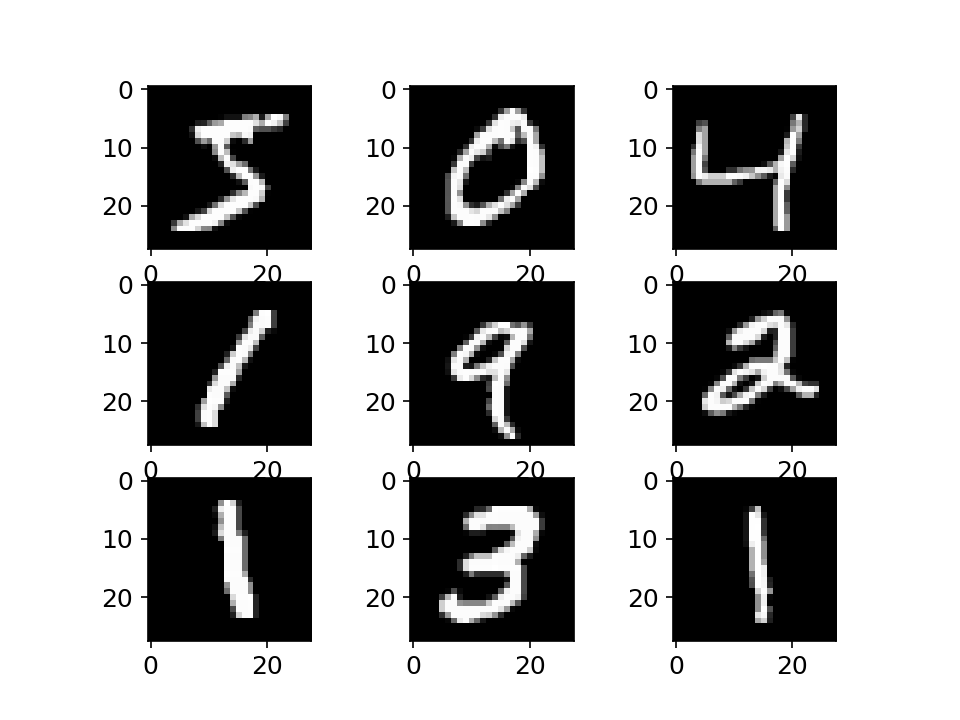

In [29]:
plt.figure()
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(np.array(X.iloc[i]).reshape(28,28), cmap='gray')
    
plt.show()

In [8]:
y=y.astype(np.uint8)
print(y[:9])
print()
print(sorted(np.unique(y)))
print()
print(y.value_counts()/len(y))
print()
y.isna().sum()

0    5
1    0
2    4
3    1
4    9
5    2
6    1
7    3
8    1
Name: class, dtype: uint8

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

1    0.112529
7    0.104186
3    0.102014
2    0.099857
9    0.099400
0    0.098614
6    0.098229
8    0.097500
4    0.097486
5    0.090186
Name: class, dtype: float64



0

In [9]:
X=X.iloc[:5000,:]
y=y.iloc[:5000]
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.15, random_state=42, stratify=y)
print(y_train.value_counts()/len(y_train))
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

1    0.112471
7    0.109882
4    0.107059
6    0.100235
9    0.099059
3    0.098588
2    0.097647
0    0.095765
8    0.092471
5    0.086824
Name: class, dtype: float64


((4250, 784), (4250,), (750, 784), (750,))

In [10]:
knn=KNeighborsClassifier()

grid_params = {
    'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10],
    'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev']
}
clf = GridSearchCV(estimator = knn,  
                           param_grid = grid_params,
                           scoring = 'accuracy',
                           cv = skf,
                           verbose=0)

clf.fit(X_train, y_train)

print("Best parameters:",clf.best_params_)
print("Best score:",clf.best_score_)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 3}
Best score: 0.9242353411028578


<IPython.core.display.Javascript object>


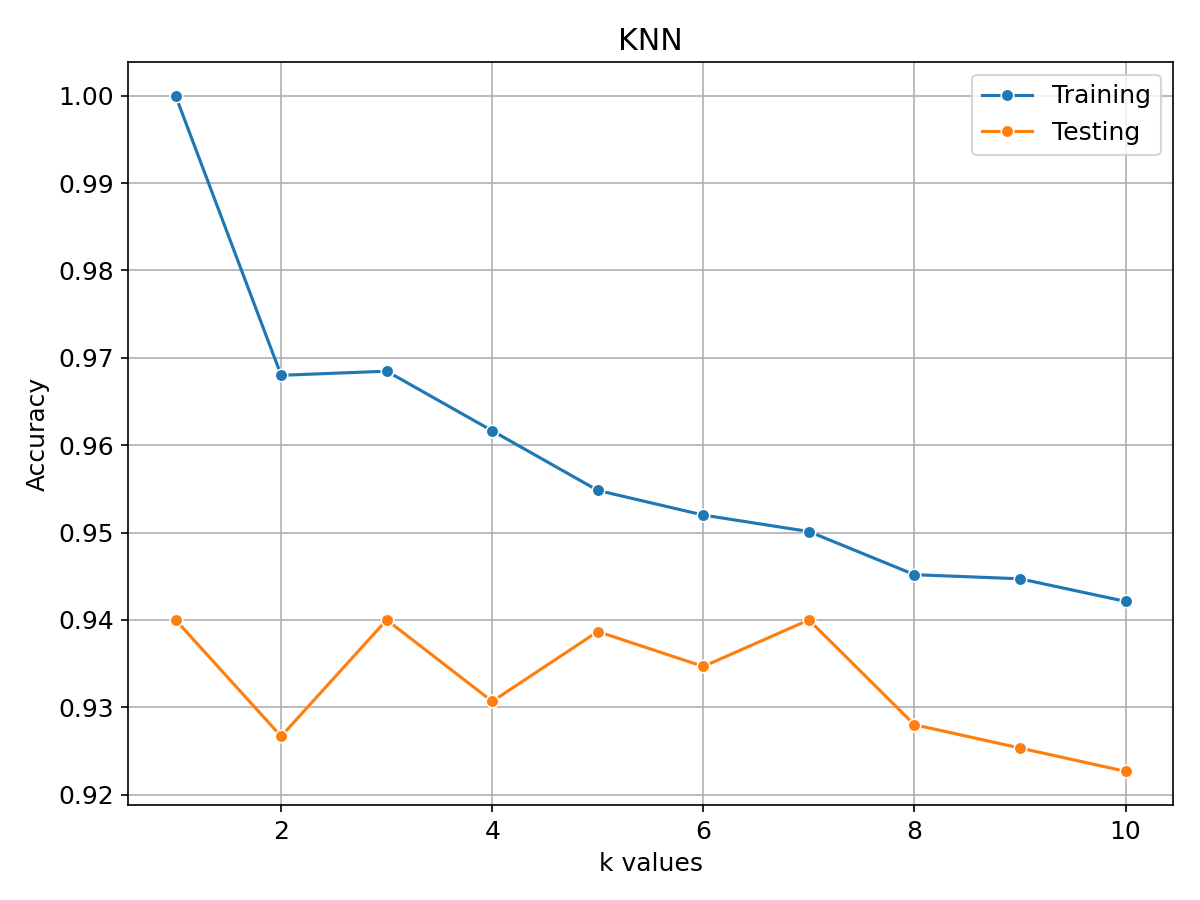

Best Accuracy: 0.94 \ Best k: 1


In [32]:
train_acc={}
test_acc={}
k_list=[i for i in range(1,11)]
for i in k_list:
    knn=KNeighborsClassifier(n_neighbors=i) #euclidean ist standard
    knn.fit(X_train, y_train)
    train_acc[i]=knn.score(X_train, y_train)
    test_acc[i]=knn.score(X_test, y_test)
    
plt.figure(figsize=(8,6))
sns.lineplot(x=k_list, y=list(train_acc.values()), label='Training', marker='o')
sns.lineplot(x=k_list, y=list(test_acc.values()), label='Testing', marker='o')
plt.xlabel('k values')
plt.ylabel('Accuracy')
plt.title('KNN')
plt.grid()
plt.tight_layout()
plt.show()

maxi=max(list(test_acc.values()))
best=max(test_acc, key=test_acc.get)
print(f'Best Accuracy: {maxi} \ Best k: {best}')

Train
[[406   1   0   0   0   0   0   0   0   0]
 [  0 477   1   0   0   0   0   0   0   0]
 [  1  11 397   1   0   0   1   4   0   0]
 [  0   2   2 404   0   3   1   4   2   1]
 [  0   8   0   0 435   0   2   0   0  10]
 [  0   1   1   5   1 356   2   0   0   3]
 [  3   3   0   0   0   0 420   0   0   0]
 [  0   7   0   0   1   0   0 456   0   3]
 [  2   8   3   7   1   5   1   1 363   2]
 [  5   3   1   2   4   2   0   2   0 402]]

Hamming Loss: 0.032



<IPython.core.display.Javascript object>


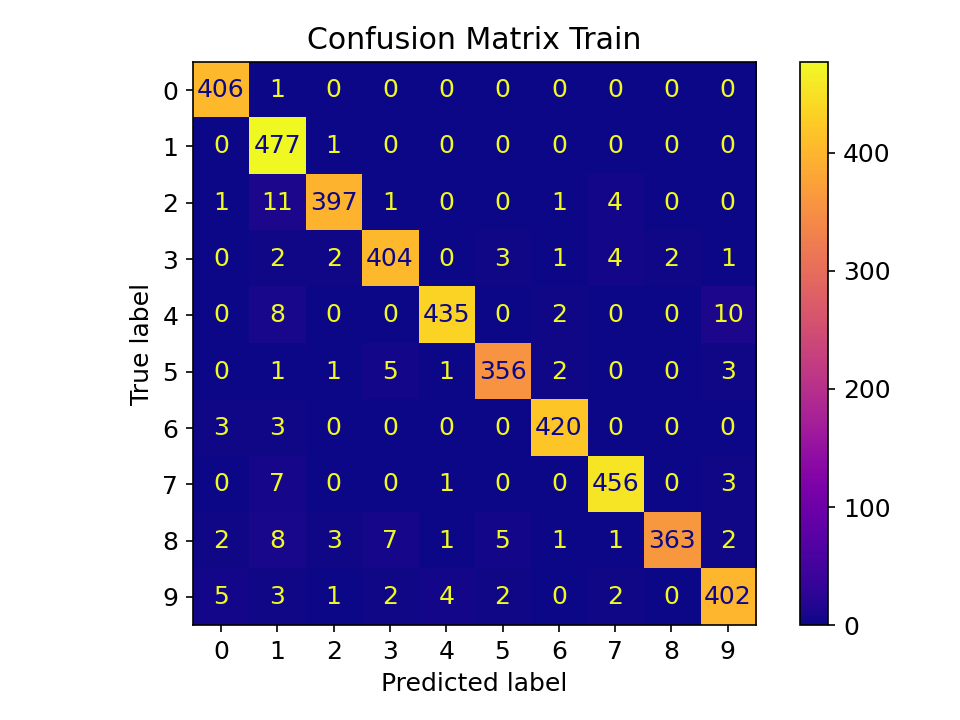

<IPython.core.display.Javascript object>


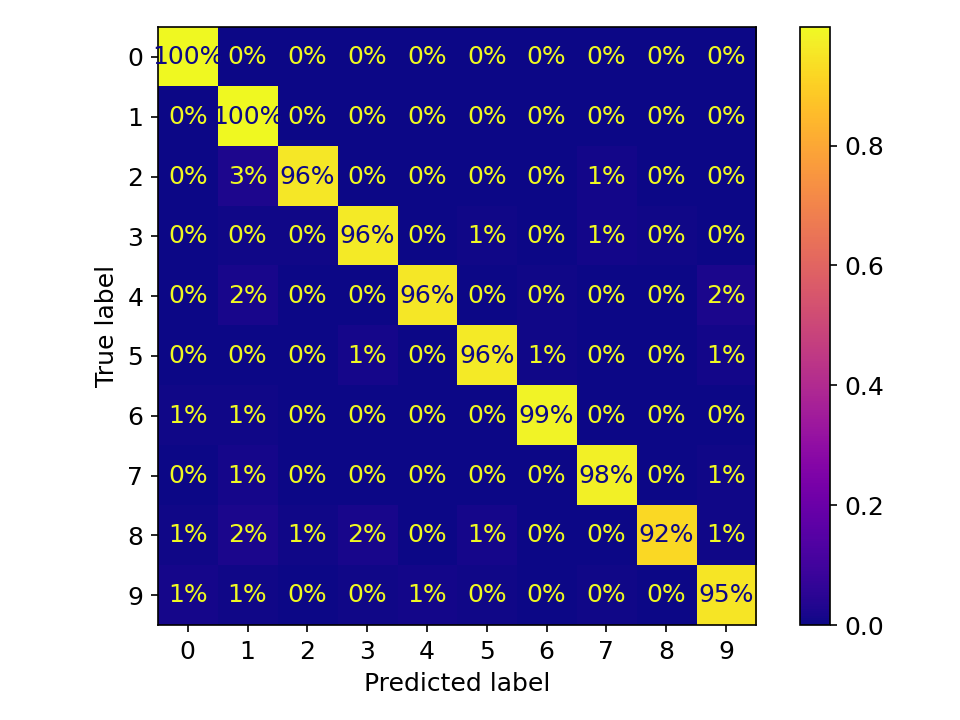

Train
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       407
           1       0.92      1.00      0.95       478
           2       0.98      0.96      0.97       415
           3       0.96      0.96      0.96       419
           4       0.98      0.96      0.97       455
           5       0.97      0.96      0.97       369
           6       0.98      0.99      0.98       426
           7       0.98      0.98      0.98       467
           8       0.99      0.92      0.96       393
           9       0.95      0.95      0.95       421

    accuracy                           0.97      4250
   macro avg       0.97      0.97      0.97      4250
weighted avg       0.97      0.97      0.97      4250


Cross-Validation Scores: [0.92095977 0.92731122 0.92443503]
Durchschnittliche Genauigkeit: 0.9242353411028578
Standardabweichung: 0.0025968089483514104


In [39]:
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)
y_pred_train_knn=knn.predict(X_train)
print('Train')
cm_train = confusion_matrix(y_train, y_pred_train_knn)
print(confusion_matrix(y_train,y_pred_train_knn))
print()
print(f'Hamming Loss: {hamming_loss(y_train, y_pred_train_knn):.3f}')
print()

plt.rc('font', size=12) 
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_knn, cmap='plasma')
plt.title('Confusion Matrix Train')
plt.tight_layout()

plt.rc('font', size=12)
ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train_knn,
                                        normalize="true", values_format=".0%", cmap='plasma')
plt.tight_layout()
plt.show()
print('Train')
print(classification_report(y_train, y_pred_train_knn))
print()
cv_scores_train_knn = cross_val_score(knn, X_train, y_train, cv=skf)
# Ausgabe der Ergebnisse
print("Cross-Validation Scores:", cv_scores_train_knn)
print("Durchschnittliche Genauigkeit:", cv_scores_train_knn.mean())
print("Standardabweichung:", cv_scores_train_knn.std())

In [36]:
y_pred_test_knn=knn.predict(X_test)
print('Test')
print(confusion_matrix(y_test,y_pred_test_knn))
print()
print('Test')
print(classification_report(y_test, y_pred_test_knn))
accuracy_knn = accuracy_score(y_test, y_pred_test_knn)

Test
[[71  0  0  0  0  0  1  0  0  0]
 [ 0 84  0  1  0  0  0  0  0  0]
 [ 1  3 66  0  0  0  0  2  1  0]
 [ 0  0  1 72  0  0  1  0  0  0]
 [ 0  5  0  0 72  0  1  0  0  2]
 [ 1  0  0  2  0 57  0  1  1  3]
 [ 0  0  0  0  0  0 75  0  0  0]
 [ 0  2  0  1  1  0  0 77  0  2]
 [ 1  1  1  0  0  0  0  0 62  4]
 [ 1  0  0  1  1  0  0  2  0 69]]

Test
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.88      0.99      0.93        85
           2       0.97      0.90      0.94        73
           3       0.94      0.97      0.95        74
           4       0.97      0.90      0.94        80
           5       1.00      0.88      0.93        65
           6       0.96      1.00      0.98        75
           7       0.94      0.93      0.93        83
           8       0.97      0.90      0.93        69
           9       0.86      0.93      0.90        74

    accuracy                           0.94       750
   macro

<IPython.core.display.Javascript object>


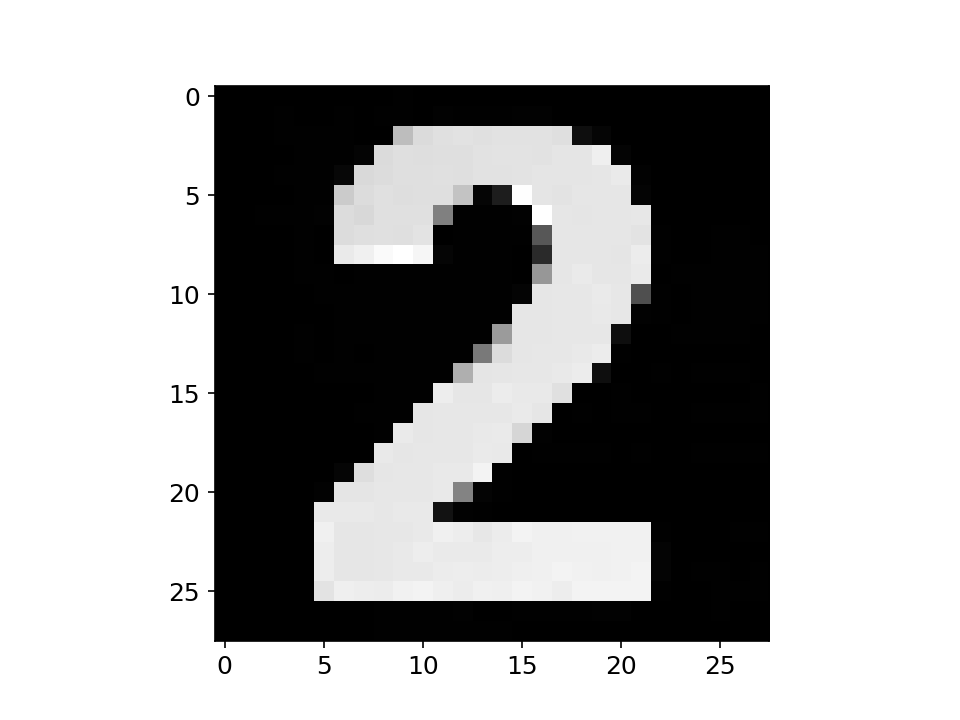

In [37]:
import cv2
pic='Herunterladen.jpg'
test_image=cv2.imread(pic, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(test_image, (28,28), interpolation=cv2.INTER_LINEAR)
image=cv2.bitwise_not(image)
plt.figure()
plt.imshow(image, cmap='gray')
image=np.array(image).reshape(1, -1)


In [38]:
image=np.array(image).reshape(1, -1)
predicted_outcome_knn = knn.predict(image)
print(f"Vorhergesagter Outcome: {predicted_outcome_knn}")
print()
y_proba_knn = knn.predict_proba(image)
print("Wahrscheinlichkeiten (pro Klasse):", y_proba_knn.round(3))

Vorhergesagter Outcome: [2]

Wahrscheinlichkeiten (pro Klasse): [[0.    0.333 0.667 0.    0.    0.    0.    0.    0.    0.   ]]
